In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
cancer.data.shape

(569, 30)

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.target_names # malignant : 악성, benign : 양성

array(['malignant', 'benign'], dtype='<U9')

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.score(x_train,y_train), clf.score(x_test,y_test)

(0.9577464788732394, 0.9230769230769231)

In [21]:
traing_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

In [22]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train,y_train)
    traing_accuracy.append(clf.score(x_train,y_train))
    test_accuracy.append(clf.score(x_test,y_test))

In [17]:
import matplotlib.pyplot as plt

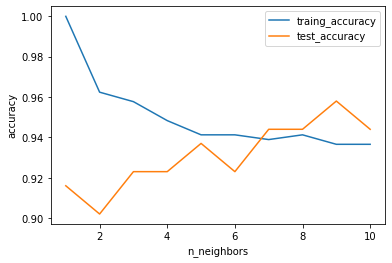

In [23]:
plt.plot(neighbors_settings, traing_accuracy, label='traing_accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend();

In [24]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [27]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [31]:
boston.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [41]:
print('훈련 세트 점수 : {:.2f}'.format(lr.score(x_train,y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(x_test,y_test)))

훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.59


In [36]:
import numpy as np

In [37]:
np.sqrt(mean_squared_error(y_train, lr.predict(x_train)))

4.396188144698282

In [39]:
r2_score(y_train, lr.predict(x_train))

0.7730135569264234

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train,y_train)

In [43]:
print('훈련 세트 점수 : {:.2f}'.format(ridge.score(x_train,y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge.score(x_test,y_test)))

훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.58


In [45]:
ridge001 = Ridge(alpha=0.01).fit(x_train,y_train)
print('훈련 세트 점수 : {:.2f}'.format(ridge001.score(x_train,y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge001.score(x_test,y_test)))

훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.59


In [48]:
ridge10 = Ridge(alpha=10).fit(x_train,y_train)
print('훈련 세트 점수 : {:.2f}'.format(ridge10.score(x_train,y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge10.score(x_test,y_test)))

훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.56


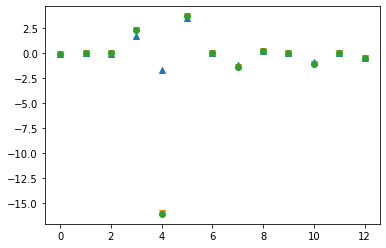

In [56]:
plt.plot(ridge10.coef_, '^', label='ridge alpha=10')
plt.plot(ridge001.coef_, 'v', label='ridge alpha=0.01')

plt.plot(lr.coef_, 'o')

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001).fit(x_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(lasso.score(x_train,y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso.score(x_test,y_test)))

훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.59
